# Random Forest Classification

## Introduction

Random Forest is an ensemble method for classification. They run by compiling multiple decision trees at taking mode of classification models.

## Features of RandomForest
<ul>
    <li>This is one of the most accurate learning algorithms. Also referred to as: <u>'Highly Accurate Classifier '</u></li>
    <li>This classifier runs efficiently on large Databases.</li>
</ul>

## Code

## Importing package

In [1]:
import numpy as np
import cv2,os

from sklearn.ensemble import RandomForestClassifier

import seaborn as sn
from matplotlib import pyplot as plt

## Importing Dataset and making it GRAYSCALE

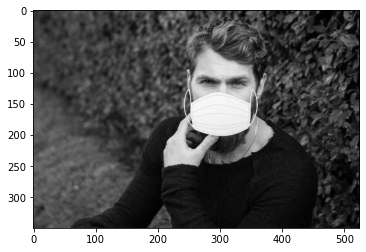

In [2]:
DATADIR = "C:/Users/mehul/Documents/Python Scripts/image processing project/data"
CATEGORIES = ["with_mask","without_mask"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break  

## Changing size of the images to keep computation efficient

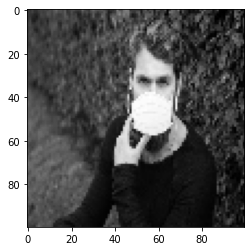

In [3]:
IMG_SIZE = 100 #change img_size to 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= "gray")
plt.show()

## Making Training Dataset

In [4]:
#training dataset

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#reading images and storing it in array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))# resizing size of the images
                training_data.append([new_array, class_num])#storing resized images on a dataset with a label
            except Exception as e:
                pass
            
create_training_data()     

## Getting feature set and Label Set

In [5]:
import numpy as np
x =[] # feature set
y= [] # label set

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(x.shape)

(7553, 100, 100, 1)


## Splitting dataset into Training Set and Testing Set

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(x,y,test_size=0.1)


## Reshaping train_data 

This is because we have train_data to have 4 values: number_of_samples, height, width, depth. We need to bring this down to 
2 values: number_of_samples and features

In [7]:
n_samples, nx, ny, nz = train_data.shape
train_data2 = train_data.reshape((n_samples, nx*ny*nz))

In [8]:
train_data2.shape
#data = (n_samples, n_features)

(6797, 10000)

## Training training set using RandomForestClassifier

In [10]:
model = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)

model.fit(train_data2, train_target)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [11]:
test_data.shape

n_samples, nx, ny, nz = test_data.shape

test_data2 = test_data.reshape((n_samples, nx*ny*nz))

test_data2.shape

(756, 10000)

## Predicting on test set

In [12]:
y_pred = model.predict(test_data2)

In [13]:
#y_pred

## Accuracy

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target, y_pred)

0.8584656084656085

Text(69.0, 0.5, 'Truth')

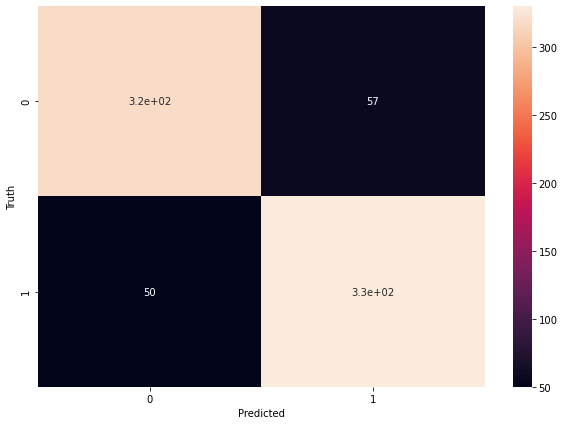

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, y_pred)

%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Feature Selection

Feature Selection is very important in model training. This helps us to reduce features out of training dataset by taking out features that are actually not that important for model training. This helps us to reduce processing time for model training. 
</br>
The overall accuracy of the model must not be affected much.

In [16]:
from sklearn.feature_selection import SelectFromModel

In [36]:
sfm = SelectFromModel(model, threshold=0.0001)

In [37]:
sfm.fit(train_data2, train_target)

SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 n_estimators=500,
                                                 random_state=0),
                threshold=0.0001)

In [38]:
x_data_train = sfm.transform(train_data2)
x_data_test = sfm.transform(test_data2)

In [39]:
x_data_train.shape

(6797, 2797)

In [40]:
x_data_test.shape

(756, 2797)

In [41]:
train_data2.shape

(6797, 10000)

In [42]:
test_data2.shape

(756, 10000)

In [43]:
classifer = RandomForestClassifier(n_estimators=300, random_state=0, criterion='entropy')

In [44]:
classifer.fit(x_data_train, train_target)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [45]:
y_pred = classifer.predict(x_data_test)

In [46]:
accuracy_score(test_target, y_pred)

0.8624338624338624